In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
# import seaborn as sb

In [10]:
def AckleyProblem(xs):
    a = np.exp(-0.2 * np.sqrt(1./len(xs) * np.square(np.linalg.norm(xs, axis=0))))
    b = - np.exp(1./len(xs) * np.sum(np.cos(2*np.pi*xs), axis=0))
    return -20 * a + b + 20 + np.exp(1)

def GradAckleyProblem(xs):
    """del H/del xi = -20 * -0.2 * xi / sqrt(1/n sum_j xj) * a + 2 pi sin(2 pi xi)/n * b"""
    a = np.exp(-0.2 * np.sqrt(1./len(xs) * np.square(np.linalg.norm(xs, axis=0))))
    b = - np.exp(1./len(xs) * np.sum(np.cos(2*np.pi*xs), axis=0))
    a_p = -0.2 * xs / np.sqrt(1./len(xs) * np.square(np.linalg.norm(xs, axis=0)))
    print(a_p)
    b_p = 2 * np.pi * np.sin(2 * np.pi * xs)/len(xs)
    return -20 * a_p * a + b_p * b
    

In [24]:
xs = np.linspace(0, 2, 2)
ys = np.linspace(0, 2, 2)

inp = np.array(np.meshgrid(xs, ys))
np.linalg.norm(inp, axis=0)

# grads = GradAckleyProblem(inp)

array([[0.        , 2.        ],
       [2.        , 2.82842712]])

In [23]:
inp

array([[[0., 2.],
        [0., 2.]],

       [[0., 0.],
        [2., 2.]]])

In [29]:
# xs = np.linspace(-100, 1000, 10000)
# ys = np.linspace(-100, 1000, 10000)

xs = np.linspace(0, 10, 100)
ys = np.linspace(0, 10, 100)

inp = np.array(np.meshgrid(xs, ys))

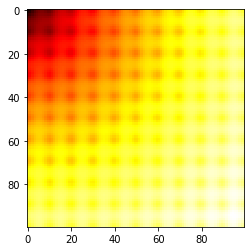

In [30]:
out = AckleyProblem(inp)


plt.imshow(out, cmap='hot', interpolation='nearest')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [1]:
def grad_descent(func, grad_func, x_curr, eps):
    x_curr = np.array(x_curr)
    while True:
        x_next = x_curr - grad_func([x_curr])
        if np.abs(func(np.array([x_next])) - func(np.array([x_curr]))) < eps:
            break
        x_curr = x_next
    return x_curr     